Evaluating Fairness in Credit Scoring systems: Code
Sofia Gonzalez

In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install surgeo

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the dataset
data = pd.read_csv('train.csv')

In [3]:
df = data.copy()
df.columns = df.columns.str.lower()

In [4]:
df.head(10)

,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
5,0x1607,CUS_0xd40,June,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,27.262259,22 Years and 6 Months,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good
6,0x1608,CUS_0xd40,July,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,22.537593,22 Years and 7 Months,No,49.574949,178.3440674122349,Low_spent_Small_value_payments,244.5653167062043,Good
7,0x1609,CUS_0xd40,August,NaN,23,#F%$D@*&8,Scientist,19114.12,1824.843333,3,...,Good,809.98,23.933795,NaN,No,49.574949,24.785216509052056,High_spent_Medium_value_payments,358.12416760938714,Standard
8,0x160e,CUS_0x21b1,January,Rick Rothackerj,28_,004-07-5839,_______,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,Low_spent_Small_value_payments,470.69062692529184,Standard
9,0x160f,CUS_0x21b1,February,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,Good,605.03,38.550848,26 Years and 8 Months,No,18.816215,40.39123782853101,High_spent_Large_value_payments,484.5912142650067,Good


In [5]:
# Split the name column into first name and last name

df[['first_name', 'last_name']] = df['name'].str.split(expand=True)

In [6]:
# Infer the race variable based on the first name 

import surgeo

f = surgeo.FirstNameModel()

f_results = f.get_probabilities(df.first_name)
df = df.drop(columns = ['first_name', 'last_name'])

# Select columns with probabilities
prob_columns = ['white', 'black', 'api', 'native', 'multiple', 'hispanic']

# Add a new column with the race having the maximum probability for each row
f_results = f_results[prob_columns].idxmax(axis=1)
f_results

0        white
1        white
2        white
3        white
4        white
         ...  
99995      NaN
99996      NaN
99997      NaN
99998      NaN
99999      NaN
Length: 100000, dtype: object

In [8]:
# Distribution of the race variable 
f_results.value_counts(normalize = True)

white       0.915538
api         0.050869
hispanic    0.033370
black       0.000222
dtype: float64

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'customer_id', 'month', 'name', 'age', 'ssn', 'occupation',
       'annual_income', 'monthly_inhand_salary', 'num_bank_accounts',
       'num_credit_card', 'interest_rate', 'num_of_loan', 'type_of_loan',
       'delay_from_due_date', 'num_of_delayed_payment', 'changed_credit_limit',
       'num_credit_inquiries', 'credit_mix', 'outstanding_debt',
       'credit_utilization_ratio', 'credit_history_age',
       'payment_of_min_amount', 'total_emi_per_month',
       'amount_invested_monthly', 'payment_behaviour', 'monthly_balance',
       'credit_score'],
      dtype='object')

In [9]:
# Checking for null values
df.isnull().sum() 

id                              0
customer_id                     0
month                           0
name                         9985
age                             0
ssn                             0
occupation                      0
annual_income                   0
monthly_inhand_salary       15002
num_bank_accounts               0
num_credit_card                 0
interest_rate                   0
num_of_loan                     0
type_of_loan                11408
delay_from_due_date             0
num_of_delayed_payment       7002
changed_credit_limit            0
num_credit_inquiries         1965
credit_mix                      0
outstanding_debt                0
credit_utilization_ratio        0
credit_history_age           9030
payment_of_min_amount           0
total_emi_per_month             0
amount_invested_monthly      4479
payment_behaviour               0
monthly_balance              1200
credit_score                    0
dtype: int64

In [10]:
# Distribution of the credit score variable 
df.credit_score.value_counts(normalize = True)

Standard    0.53174
Poor        0.28998
Good        0.17828
Name: credit_score, dtype: float64

In [11]:
df.describe()

,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,delay_from_due_date,num_credit_inquiries,credit_utilization_ratio,total_emi_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [12]:
### DEALING WITH CATEGORICAL VARIABLES

In [13]:
categorical_columns = ['credit_mix',
                      'month',
                      'occupation',
                      'payment_behaviour',
                      'payment_of_min_amount',
                      'type_of_loan',
                      'credit_score',
                      'id',
                      'customer_id',
                      'name',
                      'ssn']

In [14]:
class CategoricalTransformer():
    """
    This class provides methods for handling and transforming categorical features in a DataFrame.

    Parameters:
    - input_df (pd.DataFrame): The input DataFrame containing categorical features.

    Methods:
    - month_handling: Encodes and handles the 'month' column.
    - occupation_handling: Encodes and handles the 'occupation' column.
    - type_of_loan_handling: Handles and encodes the 'type_of_loan' column.
    - credit_mix_handling: Encodes and handles the 'credit_mix' column.
    - payment_of_min_amount_handling: Encodes and handles the 'payment_of_min_amount' column.
    - payment_behaviour_handling: Encodes and handles the 'payment_behaviour' column.
    - credit_score_handling: Encodes the 'credit_score' column.
    - column_deleter: Deletes unnecessary columns and returns the modified DataFrame.

    """
    def __init__(self,input_df:pd.DataFrame):
        self.df = input_df
    
    def month_handling(self) -> pd.DataFrame:
        if 'month' not in self.df.columns:
            raise ValueError ('"month" not found in the DataFrame.')
            
        
        self.df['month'] = self.df['month'].astype(str)
        # Encoding without first value
        month_dummies = pd.get_dummies(self.df['month'], prefix='month', drop_first=True, dtype=int)
        
        # Creating new dataframe with dummies (month_january) and without original column.
        self.df = pd.concat([self.df, month_dummies], axis=1)
        self.df.drop('month', axis=1, inplace=True)
        
        return self.df
        
    def occupation_handling(self) -> pd.DataFrame:
        if 'occupation' not in self.df.columns:
            raise ValueError ('"occupation" not found in the DataFrame.')
        
        # Deleting strange values
        self.df['occupation'] = self.df['occupation'].replace("_______", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['occupation'].astype(str)
        self.df['occupation'] = self.df.groupby('customer_id')['occupation'].transform(lambda x: x.mode()[0])
                
        # Binary encoding without first value.
        occupation_dummies = pd.get_dummies(self.df['occupation'], drop_first=True, prefix='occupation', dtype=int)
        self.df = pd.concat([self.df, occupation_dummies], axis=1)
        self.df.drop('occupation', axis=1, inplace=True)
        
        return self.df
    
    def type_of_loan_handling(self) -> pd.DataFrame:
        '''
        There are values like "Credit-Builder Loan, and Mortgage Loan". Firs of all, this method extracts all 
        specific type of loans (Credit-Builder Loan,Mortgage Loan etc.). Then creates a columns like; "has_creadit_builder_loan".
        While creating these columns it checks if that specific loan type exist in the row then return true if exist or false
        if not. Finally, true and false values return zeros and ones and original column deleted.
        '''
                 
        if 'type_of_loan' not in self.df.columns:
            raise ValueError ('type_of_loan not found in the DataFrame.')

        loan_type_split = self.df['type_of_loan'].str.split(r', and |, | and |,').dropna()

        # Flatten the resulting list of lists
        loan_types_list = [item.strip() for sublist in loan_type_split.tolist() for item in sublist]

        # Geting the unique loan types
        unique_loan_types = set(loan_types_list)        

        
        for loan_type in unique_loan_types:    
            if pd.notna(loan_type):
                # Creating new columns without spaces but instead with "_"
                new_column = (loan_type.replace(" ", "_")).lower()
                
                # This line; created columns like "has_student_loan" and return true or false, if it's emtpy return pd.NA
                self.df[f'has_{new_column}'] = self.df['type_of_loan'].apply(lambda x: loan_type in x if pd.notna(x) else pd.NA)
                #This line; transforms true and false values into zeros and ones
                self.df[f'has_{new_column}'] = self.df[f'has_{new_column}'].apply(lambda x: int(x) if x is not pd.NA else x)

                # Filling null values with mode. Since these columns are binary, mode imputation has used to fill null values.
                mode_value = self.df[f'has_{new_column}'].mode().iloc[0]
                self.df[f'has_{new_column}'].fillna(mode_value, inplace=True)
        
        self.df.drop('type_of_loan', axis=1, inplace=True)
        
        return self.df
    
    def credit_mix_handling(self) -> pd.DataFrame:
        if 'credit_mix' not in self.df.columns:
            raise ValueError ('"credit_mix" not found in the DataFrame.')
        
        # Deleting strange values like "_"
        self.df['credit_mix'] = self.df['credit_mix'].replace("_", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['credit_mix']= self.df.groupby('customer_id')['credit_mix'].transform(lambda x: x.mode()[0])
        self.df['credit_mix'].astype(str)
        
        # Binary encoding
        credit_mix_dummies = pd.get_dummies(self.df['credit_mix'], drop_first=True, prefix='credit_mix', dtype=int)
        self.df = pd.concat([self.df, credit_mix_dummies], axis=1)
        self.df.drop('credit_mix', axis=1, inplace=True)
        
        return self.df
    
    def payment_of_min_amount_handling(self) -> pd.DataFrame:
        if 'payment_of_min_amount' not in self.df.columns:
            raise ValueError ('"payment_of_min_amount" not found in the DataFrame.')
        
        # Deleting strange values like "NM"
        self.df['payment_of_min_amount'] = self.df['payment_of_min_amount'].replace("NM", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['payment_of_min_amount']= self.df.groupby('customer_id')['payment_of_min_amount'].transform(lambda x: x.mode()[0])
        self.df['payment_of_min_amount'].astype(str)
        
        # Binary encoding
        payment_of_min_amount_dummies = pd.get_dummies(self.df['payment_of_min_amount'],drop_first=True ,prefix='payment_of_min_amount', dtype=int)
        self.df = pd.concat([self.df, payment_of_min_amount_dummies], axis=1)
        self.df.drop('payment_of_min_amount', axis=1, inplace=True)
        
        return self.df
    
    def payment_behaviour_handling(self) -> pd.DataFrame:
        if 'payment_behaviour' not in self.df.columns:
            raise ValueError ('"payment_behaviour" not found in the DataFrame.')
        
        # Deleting strange values like "!@9#%8 "
        self.df['payment_behaviour'] = self.df['payment_behaviour'].replace("!@9#%8", pd.NA)
        
        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df['payment_behaviour']= self.df.groupby('customer_id')['payment_behaviour'].transform(lambda x: x.mode()[0])
        self.df['payment_behaviour'].astype(str)
        
        # Binary encoding
        payment_behaviour_dummies = pd.get_dummies(self.df['payment_behaviour'],drop_first=True , dtype=int)
        self.df = pd.concat([self.df, payment_behaviour_dummies], axis=1)
        self.df.drop('payment_behaviour', axis=1, inplace=True)
        
        return self.df
    
    
    def credit_score_handling(self) -> pd.DataFrame:
        if 'credit_score' not in self.df.columns:
            raise ValueError ('"credit_score" not found in the DataFrame.')
            
        # After executing this method values will be Poor==0, Good==1, Standard==2               
        mapping = {"Standard":2, "Poor":0, "Good":1}
        self.df['credit_score'] = self.df['credit_score'].replace(mapping)
        
        # Since this column is the target variable, I expect it to be located at the end of the dataset.
        credit_score_column = self.df['credit_score']
        self.df = self.df.drop(columns=['credit_score'])
        self.df['credit_score'] = credit_score_column
        
        return self.df
    
    #THIS COLUMN SHOULD RUN IN THE END
    def column_deleter(self) -> pd.DataFrame:
       
        # All columns lowered one more time.
        self.df.columns = self.df.columns.str.lower()
        
        # Deleting unnecessary features.
        columns_to_drop = ['name', 'ssn', 'customer_id', 'id']
        self.df.drop(columns=columns_to_drop, inplace=True)
        
        
        return self.df
    


In [15]:
### DEALING WITH NUMERICAL FEATURES

In [16]:
integer_columns_to_handle = ['age',
                            'num_bank_accounts',
                            'num_credit_card',
                            'interest_rate',
                            'num_of_loan',
                            'delay_from_due_date',
                            'num_of_delayed_payment',
                            'num_credit_inquiries',
                            'credit_history_age']

float_columns_to_handle = ['credit_utilization_ratio',
                           'annual_income',
                           'monthly_inhand_salary', 
                           'changed_credit_limit', 
                           'outstanding_debt', 
                           'total_emi_per_month',
                           'amount_invested_monthly', 
                           'monthly_balance']

In [17]:
class NumericTransformer():
    '''
    This class handles numeric features in a DataFrame. It provides methods for handling floating-point features,
    integer features, and transforming the 'credit_history_age' column.

    Parameters:
    - input_df (pd.DataFrame): The input DataFrame to be processed.

    Methods:
    - floats_handling: Handles floating-point features.
    - integers_handling: Handles integer features.
    - transform_credit_history_age: Transforms the 'credit_history_age' column.

    '''
    def __init__(self, input_df:pd.DataFrame):
        '''
        Initializes the NumericTransformer with the input DataFrame.

        Parameters:
        - input_df (pd.DataFrame): The input DataFrame to be processed.
        '''
        self.df = input_df
        self.df.columns = self.df.columns.str.lower()
        
    def floats_handling(self) -> pd.DataFrame:
        '''
        Handles floating-point features in the DataFrame.

        Returns:
        - pd.DataFrame: The DataFrame with processed floating-point features.
        '''
        columns_to_process = ['credit_utilization_ratio',
                           'annual_income',
                           'monthly_inhand_salary', 
                           'changed_credit_limit', 
                           'outstanding_debt', 
                           'total_emi_per_month',
                           'amount_invested_monthly', 
                           'monthly_balance']
        
        
        # First check if the specified columns exist in dataframe
        for column in columns_to_process:
            if column not in self.df.columns:
                raise ValueError(f"Column '{column}' not found in the DataFrame.")
         
        # Deleting specific strange values
        mapping = {'__-333333333333333333333333333__':pd.NA, 
                  '__10000__':pd.NA}
        self.df.replace(mapping, inplace=True)
        
        # Cleaning the datapoint from non-numeric characters.
        pattern = r'[^0-9.]' # Keeping numbers 0 to 9 and dots(".") because these are floats.
        for column in columns_to_process:
            self.df[column] = self.df[column].astype(str) # All columns will be changed as str to impelement replace
            self.df[column] = self.df[column].str.replace(pattern, '', regex=True) # All characters gone except 0 to 9 and dot
            self.df[column] = self.df[column].replace('', pd.NA) # After deleting characters some rows could be emtpy, they're NA now
        
        
        ## FILLING MISSING ROWS ##
        # Mode imputation will be applied to some features and mean will be applied to others(last 2)
        
        # Imputing columns except first and last three.
        for mode_column in columns_to_process[1:-3]:
            self.df[mode_column] = self.df.groupby('customer_id')[mode_column].transform(lambda x: x.mode()[0])           
            
            
        ### columns_to_process[5]/'total_emi_per_month' has 0 values so it will be treated separately ###
        # Converting float to be able to apply imputations.
        self.df['total_emi_per_month']= (self.df['total_emi_per_month'].astype(float)).round(4)
        
        # Implementing mode imputation to non-null values.
        self.df['total_emi_per_month'] = self.df.groupby('customer_id')['total_emi_per_month'].transform(lambda x: x.mode()[0] if not x.isnull().all() else pd.NA)          
        
        # There are so many zeros and they're not valid. Replacing(deleting) zeros with pd.NA then mean imputing to missing rows.
        self.df['total_emi_per_month'] = self.df['total_emi_per_month'].replace(0, pd.NA)
        self.df['total_emi_per_month'].fillna(self.df['total_emi_per_month'].median(), inplace=True)

        
        
        ## Imputation of last two features; amount_invested_monthly, monthly_balance ##
        # There will be mean imputation for these two column
        # total_emi_per_month =  Skewness: 2.55, Kurtosis: 8.74
        # monthly_balance = Skewness: 1.59, Kurtosis: 2.95
        for mean_column in columns_to_process[-2:]:            
            # Converting the column to a numeric data type, handling non-numeric values
            self.df[mean_column] = pd.to_numeric(self.df[mean_column], errors='coerce')
            # Filling missing values with the mean
            self.df[mean_column] = self.df[mean_column].fillna(self.df[mean_column].mean())
            
        # All columns will be float data type.
        self.df[columns_to_process] = self.df[columns_to_process].astype(float).round(4)
            
        return self.df
       
        
    def integers_handling(self) -> pd.DataFrame:
        '''
        Handles integer features in the DataFrame.

        Returns:
        - pd.DataFrame: The DataFrame with processed integer features.
        '''
        features_to_process = ['age',                            
                              'num_credit_card',
                              'interest_rate',
                              'delay_from_due_date',
                              'num_of_delayed_payment',
                              'num_of_loan',
                              'num_bank_accounts',
                              'num_credit_inquiries'
                              ]
        
        
        # First check if the specified columns exist in dataframe
        for column in features_to_process:
            if column not in self.df.columns:
                raise ValueError(f"Column '{column}' not found in the DataFrame.")
            


        pattern = r'[^0-9]'
        for column in features_to_process:
            self.df[column] = self.df[column].astype(str) # All columns will be changed as str to ne able to impelement replace
            self.df[column] = self.df[column].str.replace(pattern, '', regex=True) # All characters gone except 0 to 9 
            self.df[column] = self.df[column].replace('', pd.NA) #After deleting characters some rows could be emtpy, they're NA now

            # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
            self.df[column] = self.df.groupby('customer_id')[column].transform(lambda x: x.mode()[0])
            # Tranformed as int.
            self.df[column] = self.df[column].astype(int)
            
            
        #So many invalid zeros, they need to be handled (last three values in features_to_process).
        for column in features_to_process[-3:]:
            
            # I dont remember why I implemented this line of code twice but I am gonna keep it :)
            self.df[column] = self.df.groupby('customer_id')[column].transform(lambda x: x.mode()[0] if not x.isnull().all() else pd.NA)
            # Replacing zeros with pd.NA then implementing mean imputation.
            self.df[column] = self.df[column].replace(0, pd.NA)
            self.df[column].fillna(self.df[column].median(), inplace=True)
            self.df[column] = self.df[column].astype(int)

            
        return self.df
            
            
            
    def transform_credit_history_age(self) -> pd.DataFrame:
        '''
        Transforms the 'credit_history_age' column from textual format to integer format
        (e.g., 3 Years and 1 Month to 37)

        Returns:
        - pd.DataFrame: The DataFrame with the transformed 'credit_history_age' column.
        '''
        column_name = 'credit_history_age'

        # There are few kinds of null types so I replaced all of them with pd.NA
        self.df[column_name] = self.df[column_name].fillna(pd.NA)

        # Replacing missing values in each row, associated with a specific customer_id, with the most frequent value.
        self.df[column_name] = self.df.groupby('customer_id')[column_name].transform(lambda x: x.mode()[0] if not x.isnull().all() else pd.NA)

        # Converting the column to string type
        self.df[column_name] = self.df[column_name].astype(str)

        # Extracting the numeric values using regular expressions
        extracted_values = self.df[column_name].str.extract(r'(\d+) Years and (\d+) Months')

        # Converting the extracted values to integers and perform the calculation.
        self.df[column_name] = (extracted_values[0].astype(int) * 12) + extracted_values[1].astype(int)

        return self.df


In [18]:
### PREPROCESSOR

In [19]:
class Preprocessor():
    '''
    A utility class to perform transformations on a DataFrame.
    '''
    def __init__(self, dataframe:pd.DataFrame):
        '''
        Initializes numeric and categorical transformes.
        
        Paramaters:
        - dataframe(pd.DataFrame): The input DataFrame to be transformed
        '''
        
        # Creating copy of original dataframe
        self.df = dataframe.copy()
         
        # Creating instances of transformers.    
        self.num_handler = NumericTransformer(input_df=self.df)
        self.cat_handler = CategoricalTransformer(input_df=self.df)

        
    def transform(self) -> pd.DataFrame:

        # Numeric transformation
        self.df = self.num_handler.floats_handling()
        self.df = self.num_handler.integers_handling()
        self.df = self.num_handler.transform_credit_history_age()

        # Categorical transformation
        self.df = self.cat_handler.credit_mix_handling()
        self.df = self.cat_handler.month_handling()
        self.df = self.cat_handler.occupation_handling()
        self.df = self.cat_handler.payment_behaviour_handling()
        self.df = self.cat_handler.payment_of_min_amount_handling()
        self.df = self.cat_handler.type_of_loan_handling()
        self.df = self.cat_handler.credit_score_handling()
        self.df = self.cat_handler.column_deleter()

        return self.df
 

In [20]:
preprocessor = Preprocessor(dataframe=df)
transformed_df = preprocessor.transform() # Creating a new transformed dataframe
transformed_df.head(10)

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,...,has_not_specified,has_auto_loan,has_credit-builder_loan,has_student_loan,has_debt_consolidation_loan,has_mortgage_loan,has_home_equity_loan,has_payday_loan,has_personal_loan,credit_score
0,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
1,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
2,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
3,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
4,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
5,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
6,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,1
7,23,19114.12,1824.8433,3,4,3,4,3,4,11.27,...,0,1,1,0,0,0,1,0,1,2
8,28,34847.84,3037.9867,2,4,6,1,3,1,5.42,...,0,0,1,0,0,0,0,0,0,2
9,28,34847.84,3037.9867,2,4,6,1,3,1,5.42,...,0,0,1,0,0,0,0,0,0,1


In [21]:
## Add the race column
transformed_df['race'] = f_results

<AxesSubplot:>

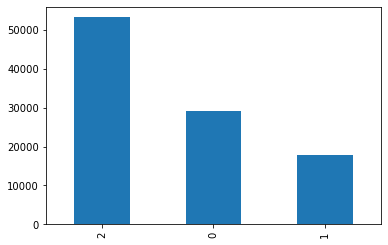

In [22]:
### HISTOGRAM
import seaborn as sns
import matplotlib.pyplot as  plt
%matplotlib inline
from scipy.stats import skew, kurtosis

transformed_df.credit_score.value_counts().plot(kind='bar')


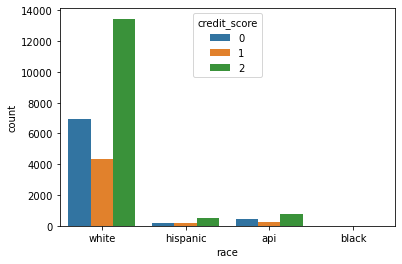

In [23]:
# Credit score by race 
import seaborn as sns
import matplotlib.pyplot as  plt

sns.countplot(x='race', hue='credit_score', data=transformed_df)

# Show the plot
plt.show()

In [24]:
### MODEL

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer, f1_score

In [25]:
# Demographic variables: age and race
no_deographics_df = transformed_df.drop(columns = ['age', 'race'])

X = no_deographics_df.drop('credit_score', axis=1)
y = no_deographics_df['credit_score']

In [26]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
### RANDOM FOREST CLASSIFIER 

In [28]:
rfc = RandomForestClassifier()
params_rfc = {'n_estimators': [16, 32, 64, 128],
        'max_depth': [None, 10, 20]
             }
              
f1_scorer = make_scorer(f1_score, average='weighted')

In [29]:
grid_searches = {}
grid_search = GridSearchCV(
        rfc,
        params_rfc,
        cv=3,  # Use the number of desired cross-validation folds
        scoring= f1_scorer,
       # n_jobs=-1,  # Use all available CPU cores
        verbose=2,
    )
grid_searches[rfc] = grid_search
   

In [30]:
best_model_rfc = {}
for rfc, grid_search in grid_searches.items():
    grid_search.fit(X = X_train, y = y_train)  # X_train and y_train are your training data
    best_model_rfc[rfc] = grid_search.best_estimator_

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ....................max_depth=None, n_estimators=16; total time=   2.7s
[CV] END ....................max_depth=None, n_estimators=16; total time=   2.7s
[CV] END ....................max_depth=None, n_estimators=16; total time=   4.5s
[CV] END ....................max_depth=None, n_estimators=32; total time=   8.1s
[CV] END ....................max_depth=None, n_estimators=32; total time=   5.8s
[CV] END ....................max_depth=None, n_estimators=32; total time=   5.4s
[CV] END ....................max_depth=None, n_estimators=64; total time=  12.4s
[CV] END ....................max_depth=None, n_estimators=64; total time=  13.1s
[CV] END ....................max_depth=None, n_estimators=64; total time=  12.5s
[CV] END ...................max_depth=None, n_estimators=128; total time=  23.2s
[CV] END ...................max_depth=None, n_estimators=128; total time=  20.6s
[CV] END ...................max_depth=None, n_es

In [31]:
best_model_rfc

{RandomForestClassifier(): RandomForestClassifier(n_estimators=128)}

In [32]:
best_f1_score = -1  # Initialize with a low value
best_model_rfc = None

for model_name, grid_search in grid_searches.items():
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score for {model_name}: {grid_search.best_score_}")
    print("=="*25,"\n")

    if grid_search.best_score_ > best_f1_score:
        best_f1_score = grid_search.best_score_
        best_model_rfc = grid_search.best_estimator_

Best parameters for RandomForestClassifier(): {'max_depth': None, 'n_estimators': 128}
Best F1 score for RandomForestClassifier(): 0.8053289581544819



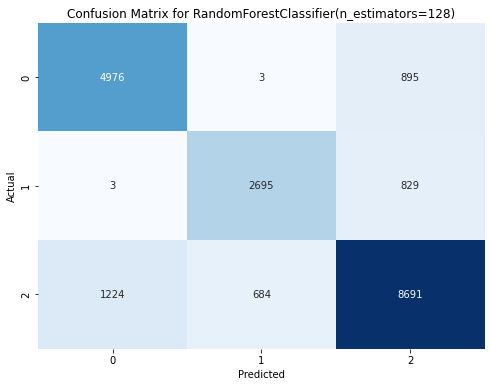

Classification Report for RandomForestClassifier(n_estimators=128):

              precision    recall  f1-score   support

           0       0.80      0.85      0.82      5874
           1       0.80      0.76      0.78      3527
           2       0.83      0.82      0.83     10599

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



In [33]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_rfc = best_model_rfc.predict(X_test)
confusion = confusion_matrix(y_test, y_pred_rfc)
report = classification_report(y_test, y_pred_rfc)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_rfc}')
plt.show()

# Print the classification report
print(f"Classification Report for {best_model_rfc}:\n")
print(report)

In [34]:
### XGBOOST CLASSIFIER

In [35]:
xgb = XGBClassifier()
params_xgb = {'learning_rate': [0.1, 0.05, 0.001],
        'n_estimators': [16, 32, 64, 128],
        #'max_depth': [3, 4, 5],
        'subsample': [0.7, 0.8]
             }
              
f1_scorer = make_scorer(f1_score, average='weighted')

In [36]:
grid_searches = {}
grid_search = GridSearchCV(
        xgb,
        params_xgb,
        cv=3,  # Use the number of desired cross-validation folds
        scoring= f1_scorer,
       # n_jobs=-1,  # Use all available CPU cores
        verbose=2,
    )
grid_searches[xgb] = grid_search

In [37]:
best_model_xgb = {}
for xgb, grid_search in grid_searches.items():
    grid_search.fit(X = X_train, y = y_train)  
    best_model_xgb[xgb] = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END ..learning_rate=0.1, n_estimators=16, subsample=0.7; total time=  25.4s
[CV] END ..learning_rate=0.1, n_estimators=16, subsample=0.7; total time=  13.3s
[CV] END ..learning_rate=0.1, n_estimators=16, subsample=0.7; total time=  13.0s
[CV] END ..learning_rate=0.1, n_estimators=16, subsample=0.8; total time=   9.8s
[CV] END ..learning_rate=0.1, n_estimators=16, subsample=0.8; total time=  11.4s
[CV] END ..learning_rate=0.1, n_estimators=16, subsample=0.8; total time=  23.9s
[CV] END ..learning_rate=0.1, n_estimators=32, subsample=0.7; total time=  43.8s
[CV] END ..learning_rate=0.1, n_estimators=32, subsample=0.7; total time=  40.1s
[CV] END ..learning_rate=0.1, n_estimators=32, subsample=0.7; total time=  44.4s
[CV] END ..learning_rate=0.1, n_estimators=32, subsample=0.8; total time=  34.8s
[CV] END ..learning_rate=0.1, n_estimators=32, subsample=0.8; total time=  34.4s
[CV] END ..learning_rate=0.1, n_estimators=32, s

In [38]:
best_model_xgb

{XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...): XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_m

In [39]:
best_f1_score = -1  # Initialize with a low value
best_models_xgb = None

for model_name, grid_search in grid_searches.items():
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best F1 score for {model_name}: {grid_search.best_score_}")
    print("=="*25,"\n")

    if grid_search.best_score_ > best_f1_score:
        best_f1_score = grid_search.best_score_
        best_models_xgb = grid_search.best_estimator_

Best parameters for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): {'learning_rate': 0.1, 'n_estimators': 128, 'subsample': 0.7}
Best F1 score for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_b

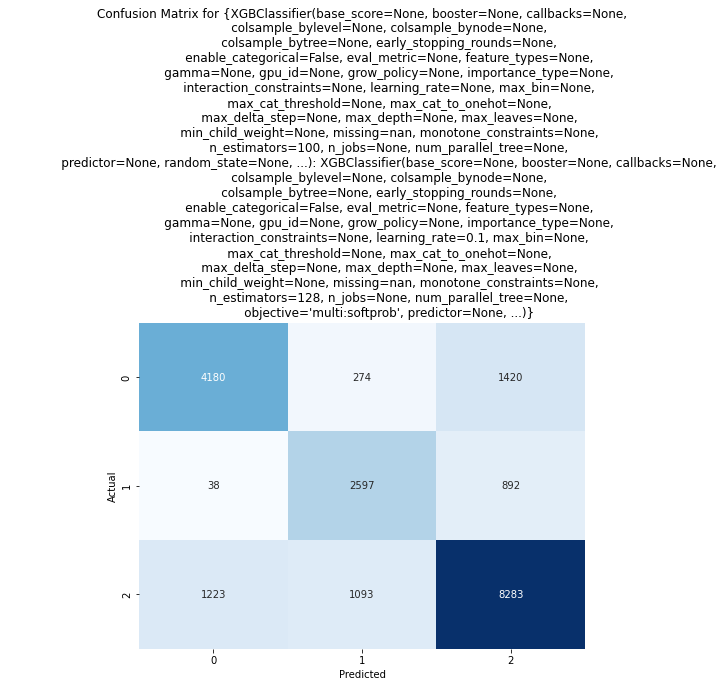

Classification Report for {XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...): XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=

In [40]:
y_pred_xgb = best_models_xgb.predict(X_test)
confusion = confusion_matrix(y_test, y_pred_xgb)
report = classification_report(y_test, y_pred_xgb)

# Plot a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix for {best_model_xgb}')
plt.show()

# Print the classification report
print(f"Classification Report for {best_model_xgb}:\n")
print(report)

In [41]:
# Combining the predictions of both models
result_df = pd.DataFrame({'Actual': y_test, 'Predicted rfc': y_pred_rfc, 'Predicted xgb': y_pred_xgb}, index=X_test.index)
result_df

,Actual,Predicted rfc,Predicted xgb
75721,1,1,1
80184,0,0,2
19864,1,2,1
76699,0,0,0
92991,1,1,1
...,...,...,...
32595,2,2,2
29313,2,2,2
37862,0,2,2
53421,2,2,2


In [42]:
# Combining the predictions of both models with demographic variables 
demographic_df = pd.merge(transformed_df[['age', 'race']], result_df, left_index=True, right_index=True)
demographic_df

,age,race,Actual,Predicted rfc,Predicted xgb
8,28,white,2,1,1
23,34,NaN,2,1,1
39,21,NaN,2,2,2
53,34,NaN,2,1,1
70,23,white,1,1,1
...,...,...,...,...,...
99967,18,white,1,1,1
99971,45,hispanic,1,1,1
99991,28,white,2,2,2
99993,25,NaN,2,0,0


In [43]:
### LET'S EXAMINE THE MODELS MORE IN DETAIL

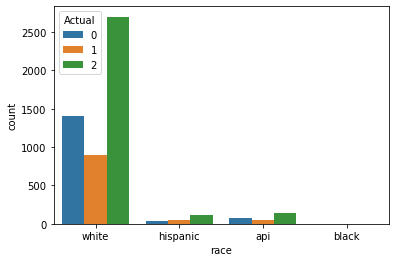

In [44]:
import seaborn as sns
import matplotlib.pyplot as  plt

sns.countplot(x='race', hue='Actual', data=demographic_df)

# Show the plot
plt.show()

In [45]:
demographic_df[['race', 'Actual']].value_counts(normalize=True) * 100

race      Actual
white     2         49.414134
          0         25.668253
          1         16.477481
api       2          2.599780
hispanic  2          2.032223
api       0          1.409740
          1          0.897107
hispanic  1          0.878799
          0          0.604174
black     2          0.018308
dtype: float64

In [46]:
## RANDOM FOREST

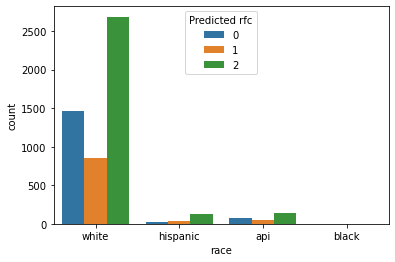

In [47]:
import seaborn as sns
import matplotlib.pyplot as  plt

sns.countplot(x='race', hue='Predicted rfc', data=demographic_df)

# Show the plot
plt.show()

In [48]:
demographic_df[['race', 'Predicted rfc']].value_counts(normalize=True) * 100
# bias againts black and hispanic people (a lot against black people)

race      Predicted rfc
white     2                49.157818
          0                26.803369
          1                15.598682
api       2                 2.618089
hispanic  2                 2.398389
api       0                 1.482973
          1                 0.805566
hispanic  1                 0.585866
          0                 0.530941
black     0                 0.018308
dtype: float64

In [49]:
# Accuracy by race 
overall_accuracy = accuracy_score(demographic_df.Actual, demographic_df['Predicted rfc'])
accuracy_by_race = demographic_df.groupby('race').apply(lambda group: accuracy_score(group['Actual'], group['Predicted rfc']))
accuracy_by_age = demographic_df.groupby('age').apply(lambda group: accuracy_score(group['Actual'], group['Predicted rfc']))

print('Overall accuracy:', overall_accuracy)
print()
print('Accuracy by race:', accuracy_by_race)
print()
print('Accuracy by age:', accuracy_by_age)
# no proof of bias againts young people 

Overall accuracy: 0.8181

Accuracy by race: race
api         0.876866
black       0.000000
hispanic    0.770833
white       0.822436
dtype: float64

Accuracy by age: age
14    0.800847
15    0.808050
16    0.830565
17    0.813505
18    0.841393
19    0.829642
20    0.831522
21    0.792642
22    0.830696
23    0.826316
24    0.764479
25    0.793160
26    0.821549
27    0.851254
28    0.815359
29    0.793478
30    0.823214
31    0.776699
32    0.810313
33    0.822976
34    0.805556
35    0.799669
36    0.835106
37    0.824367
38    0.800940
39    0.836457
40    0.801587
41    0.855596
42    0.815939
43    0.846011
44    0.842905
45    0.839187
46    0.780120
47    0.806867
48    0.860714
49    0.874539
50    0.793651
51    0.789831
52    0.822642
53    0.839286
54    0.828794
55    0.785211
56    0.787879
dtype: float64


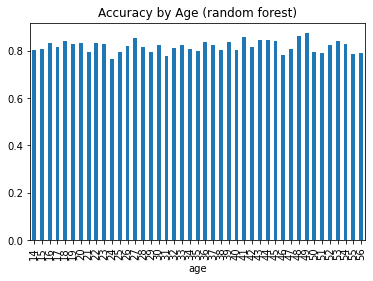

In [50]:
accuracy_by_age.plot(kind='bar')
plt.title('Accuracy by Age (random forest)')
plt.show()

In [51]:
feature_importance_rfc = pd.DataFrame({'Feature': X.columns, 'Importance': best_model_rfc.feature_importances_})
feature_importance_rfc.sort_values(by='Importance', ascending=False)

,Feature,Importance
10,outstanding_debt,0.095148
4,interest_rate,0.068144
6,delay_from_due_date,0.057308
15,monthly_balance,0.055787
14,amount_invested_monthly,0.054641
11,credit_utilization_ratio,0.053641
8,changed_credit_limit,0.050060
16,credit_mix_good,0.042573
12,credit_history_age,0.040148
17,credit_mix_standard,0.038002


In [52]:
## XGBOOST

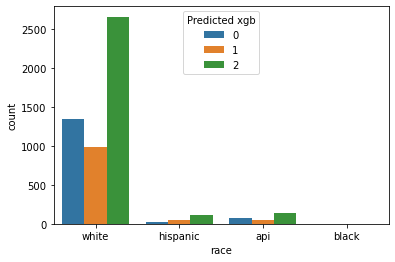

In [53]:
import seaborn as sns
import matplotlib.pyplot as  plt

sns.countplot(x='race', hue='Predicted xgb', data=demographic_df)

# Show the plot
plt.show()

In [54]:
demographic_df[['race', 'Predicted xgb']].value_counts(normalize=True) * 100

race      Predicted xgb
white     2                48.755035
          0                24.642988
          1                18.161845
api       2                 2.618089
hispanic  2                 2.087148
api       0                 1.336507
hispanic  1                 0.988649
api       1                 0.952032
hispanic  0                 0.439399
black     0                 0.018308
dtype: float64

In [55]:
# Accuracy by race 
overall_accuracy = accuracy_score(demographic_df.Actual, demographic_df['Predicted xgb'])
accuracy_by_race = demographic_df.groupby('race').apply(lambda group: accuracy_score(group['Actual'], group['Predicted xgb']))
accuracy_by_age = demographic_df.groupby('age').apply(lambda group: accuracy_score(group['Actual'], group['Predicted xgb']))

print('Overall accuracy:', overall_accuracy)
print()
print('Accuracy by race:', accuracy_by_race)
print()
print('Accuracy by age:', accuracy_by_age)
# no proof of bias againts young people 

Overall accuracy: 0.753

Accuracy by race: race
api         0.791045
black       0.000000
hispanic    0.750000
white       0.757848
dtype: float64

Accuracy by age: age
14    0.741525
15    0.789474
16    0.747508
17    0.717042
18    0.787234
19    0.773424
20    0.762681
21    0.744147
22    0.764241
23    0.761404
24    0.722008
25    0.749186
26    0.759259
27    0.788530
28    0.764706
29    0.766304
30    0.762500
31    0.720065
32    0.721915
33    0.738230
34    0.736111
35    0.738411
36    0.799645
37    0.754747
38    0.728840
39    0.747871
40    0.742063
41    0.761733
42    0.755218
43    0.792208
44    0.807432
45    0.752311
46    0.710843
47    0.703863
48    0.764286
49    0.752768
50    0.710317
51    0.725424
52    0.701887
53    0.775000
54    0.719844
55    0.718310
56    0.833333
dtype: float64


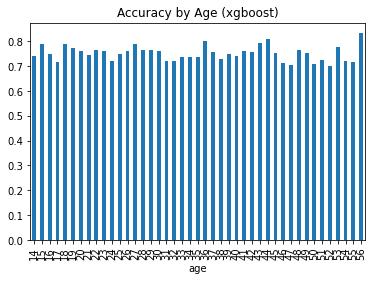

In [56]:
accuracy_by_age.plot(kind='bar')
plt.title('Accuracy by Age (xgboost)')
plt.show()

In [57]:
feature_importance_xgb = pd.DataFrame({'Feature': X.columns, 'Importance': best_model_xgb[xgb].feature_importances_})
feature_importance_xgb.sort_values(by='Importance', ascending=False)

,Feature,Importance
16,credit_mix_good,0.383300
17,credit_mix_standard,0.246837
44,payment_of_min_amount_yes,0.046775
10,outstanding_debt,0.038194
4,interest_rate,0.020589
3,num_credit_card,0.015983
19,month_february,0.014605
20,month_january,0.013459
6,delay_from_due_date,0.013360
23,month_march,0.012499


In [58]:
### BIAS EVALUATION

In [59]:
# Find a black individual 
pd.set_option('display.max_columns', None)
transformed_df.loc[[65503]]

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_mix_good,credit_mix_standard,month_august,month_february,month_january,month_july,month_june,month_march,month_may,occupation_architect,occupation_developer,occupation_doctor,occupation_engineer,occupation_entrepreneur,occupation_journalist,occupation_lawyer,occupation_manager,occupation_mechanic,occupation_media_manager,occupation_musician,occupation_scientist,occupation_teacher,occupation_writer,high_spent_medium_value_payments,high_spent_small_value_payments,low_spent_large_value_payments,low_spent_medium_value_payments,low_spent_small_value_payments,payment_of_min_amount_yes,has_not_specified,has_auto_loan,has_credit-builder_loan,has_student_loan,has_debt_consolidation_loan,has_mortgage_loan,has_home_equity_loan,has_payday_loan,has_personal_loan,credit_score,race
65503,28,19852.32,1413.36,7,8,29,6,40,17,1.98,80,2625.27,34.7776,190,52.9307,185.1004,193.3048,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,0,1,0,0,1,1,2,black


In [60]:
demographic_df.loc[[65503]]

,age,race,Actual,Predicted rfc,Predicted xgb
65503,28,black,2,0,0


In [61]:
# Find a white person with similar characteristics
transformed_df[(transformed_df['outstanding_debt'] > 2500) & (transformed_df['outstanding_debt'] < 2700) & (transformed_df['interest_rate'] == 29) & (transformed_df['race'] == 'white') & (transformed_df['credit_score'] == 2)]

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_mix_good,credit_mix_standard,month_august,month_february,month_january,month_july,month_june,month_march,month_may,occupation_architect,occupation_developer,occupation_doctor,occupation_engineer,occupation_entrepreneur,occupation_journalist,occupation_lawyer,occupation_manager,occupation_mechanic,occupation_media_manager,occupation_musician,occupation_scientist,occupation_teacher,occupation_writer,high_spent_medium_value_payments,high_spent_small_value_payments,low_spent_large_value_payments,low_spent_medium_value_payments,low_spent_small_value_payments,payment_of_min_amount_yes,has_not_specified,has_auto_loan,has_credit-builder_loan,has_student_loan,has_debt_consolidation_loan,has_mortgage_loan,has_home_equity_loan,has_payday_loan,has_personal_loan,credit_score,race
20491,39,32540.80,2816.7333,10,10,29,9,32,25,16.54,60,2571.84,34.6003,70,138.5000,74.3238,318.8496,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0,2,white
36730,34,49128.90,4231.0750,8,3,29,6,11,12,13.88,70,2574.10,30.7363,166,169.5292,90.4413,413.1370,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,2,white
36735,34,49128.90,4231.0750,8,3,29,6,11,12,13.88,70,2574.10,37.8362,166,169.5292,98.5078,405.0705,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,2,white
43532,22,15134.06,1018.1717,7,7,29,7,38,16,4.03,90,2548.54,27.0751,86,71.7621,195.5395,266.1713,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,2,white
43534,22,15134.06,1018.1717,7,7,29,7,38,16,4.03,90,2548.54,40.5684,86,71.7621,133.3194,186.7357,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,2,white
69620,21,66482.20,5340.1833,7,5,29,6,36,18,16.91,110,2681.87,39.5226,82,222.1670,118.1786,433.6728,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,2,white
81349,45,17077.40,1583.1167,9,10,29,5,61,25,2.60,100,2577.55,22.5720,178,64.1719,206.7864,177.3534,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,2,white
92855,26,58754.97,5189.2475,8,8,29,5,23,14,13.39,110,2632.80,30.8553,166,236.5745,72.4174,459.9329,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,2,white


In [62]:
# White indivial selected for comparison 
transformed_df.loc[[92855]]

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_mix_good,credit_mix_standard,month_august,month_february,month_january,month_july,month_june,month_march,month_may,occupation_architect,occupation_developer,occupation_doctor,occupation_engineer,occupation_entrepreneur,occupation_journalist,occupation_lawyer,occupation_manager,occupation_mechanic,occupation_media_manager,occupation_musician,occupation_scientist,occupation_teacher,occupation_writer,high_spent_medium_value_payments,high_spent_small_value_payments,low_spent_large_value_payments,low_spent_medium_value_payments,low_spent_small_value_payments,payment_of_min_amount_yes,has_not_specified,has_auto_loan,has_credit-builder_loan,has_student_loan,has_debt_consolidation_loan,has_mortgage_loan,has_home_equity_loan,has_payday_loan,has_personal_loan,credit_score,race
92855,26,58754.97,5189.2475,8,8,29,5,23,14,13.39,110,2632.8,30.8553,166,236.5745,72.4174,459.9329,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,2,white


In [63]:
demographic_df.loc[[92855]]

,age,race,Actual,Predicted rfc,Predicted xgb
92855,26,white,2,0,0


In [64]:
# Hispanic individual 

demographic_df[(demographic_df.race == 'hispanic') & (demographic_df.Actual == 2) & (demographic_df['Predicted rfc'] != 2)]

,age,race,Actual,Predicted rfc,Predicted xgb
13130,46,hispanic,2,1,1
20266,49,hispanic,2,1,1
23850,43,hispanic,2,0,2
37731,28,hispanic,2,1,1
37733,28,hispanic,2,1,1
46800,55,hispanic,2,1,1
55417,32,hispanic,2,0,0
56927,24,hispanic,2,1,1
57112,35,hispanic,2,0,1
57113,35,hispanic,2,0,1


In [65]:
transformed_df.loc[[55417]]

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_mix_good,credit_mix_standard,month_august,month_february,month_january,month_july,month_june,month_march,month_may,occupation_architect,occupation_developer,occupation_doctor,occupation_engineer,occupation_entrepreneur,occupation_journalist,occupation_lawyer,occupation_manager,occupation_mechanic,occupation_media_manager,occupation_musician,occupation_scientist,occupation_teacher,occupation_writer,high_spent_medium_value_payments,high_spent_small_value_payments,low_spent_large_value_payments,low_spent_medium_value_payments,low_spent_small_value_payments,payment_of_min_amount_yes,has_not_specified,has_auto_loan,has_credit-builder_loan,has_student_loan,has_debt_consolidation_loan,has_mortgage_loan,has_home_equity_loan,has_payday_loan,has_personal_loan,credit_score,race
55417,32,31700.3,2444.6917,10,8,16,5,25,19,8.78,90,2482.73,37.328,106,66.8661,173.0741,274.5289,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,2,hispanic


In [66]:
# Find a white person with similar characteristics
transformed_df[(transformed_df['outstanding_debt'] > 2500) & (transformed_df['outstanding_debt'] < 2600) & (transformed_df.interest_rate >= 15) & (transformed_df.interest_rate <= 17) & (transformed_df['race'] == 'white') & (transformed_df['credit_score'] == 2)]

,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,changed_credit_limit,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,total_emi_per_month,amount_invested_monthly,monthly_balance,credit_mix_good,credit_mix_standard,month_august,month_february,month_january,month_july,month_june,month_march,month_may,occupation_architect,occupation_developer,occupation_doctor,occupation_engineer,occupation_entrepreneur,occupation_journalist,occupation_lawyer,occupation_manager,occupation_mechanic,occupation_media_manager,occupation_musician,occupation_scientist,occupation_teacher,occupation_writer,high_spent_medium_value_payments,high_spent_small_value_payments,low_spent_large_value_payments,low_spent_medium_value_payments,low_spent_small_value_payments,payment_of_min_amount_yes,has_not_specified,has_auto_loan,has_credit-builder_loan,has_student_loan,has_debt_consolidation_loan,has_mortgage_loan,has_home_equity_loan,has_payday_loan,has_personal_loan,credit_score,race
18587,44,15148.98,1280.4150,6,9,17,2,16,12,14.76,110,2530.46,23.4106,206,25.1806,118.7796,274.0814,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,2,white
43842,31,42122.43,3451.2025,7,10,15,4,50,20,19.30,60,2589.31,32.7147,166,114.8871,214.6564,305.5767,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,2,white
43847,31,42122.43,3451.2025,7,10,15,4,50,20,19.30,60,2589.31,33.1236,166,114.8871,176.0428,314.1904,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,2,white
62813,42,20039.58,1862.9650,6,6,17,6,21,18,2.28,60,2507.45,28.6618,239,64.0385,119.9978,262.2602,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,1,0,0,2,white
63949,39,56089.95,4875.1625,9,5,15,7,57,19,4.31,90,2561.61,35.5880,71,276.5353,63.4384,397.5426,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,0,2,white
63951,39,56089.95,4875.1625,9,5,15,7,57,19,4.31,90,2561.61,35.0102,71,276.5353,274.7928,226.1882,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,0,2,white
95183,21,17009.84,1469.4867,7,8,15,3,34,17,19.22,60,2587.80,36.3746,154,21.3094,195.5395,263.2136,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,2,white
98062,27,29095.94,2450.5814,5,3,17,4,5,20,8.01,80,2510.12,28.1728,82,185.6459,28.5860,416.1145,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,2,white


In [67]:
demographic_df.loc[[43842]]

,age,race,Actual,Predicted rfc,Predicted xgb
43842,31,white,2,0,0


In [68]:
### SALARY VARIABLE ANALYSIS 
salary_test = pd.merge(demographic_df, X_test[['annual_income', 'monthly_inhand_salary']], left_index=True, right_index=True)
salary_test

,age,race,Actual,Predicted rfc,Predicted xgb,annual_income,monthly_inhand_salary
8,28,white,2,1,1,34847.84,3037.9867
23,34,NaN,2,1,1,143162.64,12187.2200
39,21,NaN,2,2,2,35547.71,2853.3092
53,34,NaN,2,1,1,131313.40,10469.2078
70,23,white,1,1,1,114838.41,9843.8675
...,...,...,...,...,...,...,...
99967,18,white,1,1,1,42903.79,3468.3158
99971,45,hispanic,1,1,1,16680.35,1528.0292
99991,28,white,2,2,2,20002.88,1929.9067
99993,25,NaN,2,0,0,39628.99,3359.4158


In [69]:
# No correlation between salary and age
print(salary_test.age.corr(salary_test.annual_income))
print(salary_test.age.corr(salary_test.monthly_inhand_salary))

0.08072426504555771
0.07990518353424399


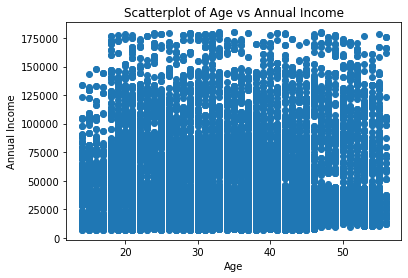

In [70]:
plt.scatter(salary_test.age, salary_test.annual_income)  
plt.title('Scatterplot of Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

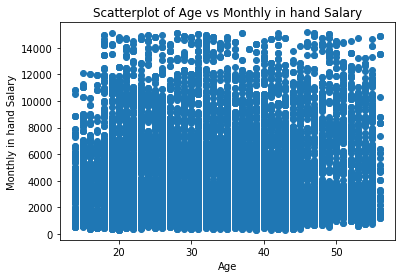

In [71]:
plt.scatter(salary_test.age, salary_test.monthly_inhand_salary)  
plt.title('Scatterplot of Age vs Monthly in hand Salary')
plt.xlabel('Age')
plt.ylabel('Monthly in hand Salary')
plt.show()

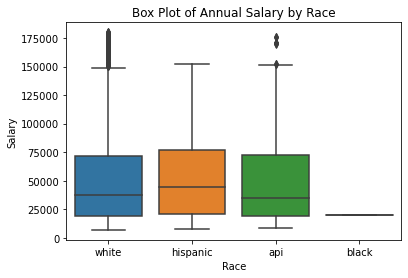

In [72]:
# SALARY VS RACE
sns.boxplot(x='race', y='annual_income', data=salary_test)
plt.title('Box Plot of Annual Salary by Race')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.show()

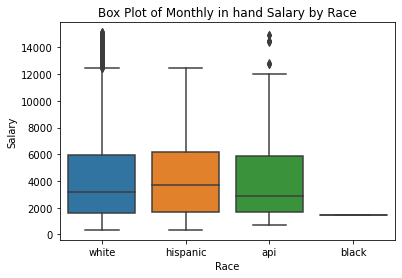

In [73]:
sns.boxplot(x='race', y='monthly_inhand_salary', data=salary_test)
plt.title('Box Plot of Monthly in hand Salary by Race')
plt.xlabel('Race')
plt.ylabel('Salary')
plt.show()